<a href="https://colab.research.google.com/github/musicjae/Hands_on_ML/blob/master/(4)%20Training%20Models/(4)_Training_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

KeyboardInterrupt: ignored

In [ ]:
from IPython.display import Image

# 4.1 선형 모델  

Linear Model:  

  
$\hat{y}=\theta_1x_1+ ... +\theta_n x_n$+$\theta_0$  

> $\theta$: Weight of the feature  
  $x$: Features  
  $\theta_0$: Bias  
  $\hat{y}$: Predicted value  


$\hat{y}$ = $h_{\theta} x = \theta x$  
  
$\hat{y} = \theta^T x = \begin{equation*}
\begin{pmatrix}
\theta_0 & ... & \theta_n \
\end{pmatrix}
\end{equation*}$ $\begin{equation*}
\begin{pmatrix}
x_0\\
... \\
x_n
\end{pmatrix}
\end{equation*}$

## 4.1.1 모델은 훈련 데이터에 얼마나 잘 들어맞는가?  
  
 우리는 모델에 훈련 데이터가 얼마나 잘 들어맞는지를 알아보기 위해 가령 MSE, RMSE 같은 오차 측정법을 사용한다.  
   
- MSE($X,h_{\theta})$$=\frac{1}{m}\sum_{i=1}^m (\theta^Tx^i - y^i)^2$  
  
> - $\theta^Tx^i$: 예측값  
- $y^i$: 참값

## 4.1.2 Normal Equation ( Find $\theta$ to minimize the cost function)  
  

### 4.1.2.1. Analytic Method 
  
$\hat{\theta}=(X^T X)^{-1} X^T Y$  
  
> - $\hat{\theta}$ : 비용 함수를 최소화 해주는 $\theta$  
- $Y=
\begin{pmatrix}
y_1 & ... & y_m\
\end{pmatrix}
$  
- $(X^T X)^{-1}$이 특이행렬이면 (즉 역행렬이 존재하지 않으면) 위 방법을 사용할 수 없다.

In [4]:
import numpy as np

X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

X_b = np.c_[np.ones((100,1)),X] # 모든 샘플에 x0=1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(theta_best) # 4,3 이랑 근접

[[4.05230377]
 [2.93568058]]


### 4.1.2.2. Alternative Analytic Method 
  
$\hat{\theta} = X^{+} Y$  
  
> - $X^+$: 이것은 훈련 셋 $X$를 $U\sum V^T$로 분해하는 SVD에 의해 계산된다. $X^+$는 $V\sum^+ U^+$로 계산되는 Pseudoinverse (Moore-Penrose Inverse)이다.  
- 위 계산에서 $\sum^+$는   
(1) Calculate $\sum$,   
(2) $\forall x_i: x_i < \epsilon$(특정 임곗값), then $x_i=0$,   
(3) $\forall x_i: x_i \ne 0$, then $\frac{1}{x_i}$,  
(4) (3)에서 계산된 행렬을 전치행렬로 바꾼다.

In [5]:
np.linalg.pinv(X_b).dot(y) # pinv로 유사역행렬 구한다.

array([[4.05230377],
       [2.93568058]])

## 4.1.3 계산 복잡도  
  
Normal equation의 복잡도: $(n+1)^2$.   
  
    
    ==> 복잡도가 상대적으로 높다!

# 4.2 경사 하강법  
  
 Tune the parameters to minimize values of the cost_function 

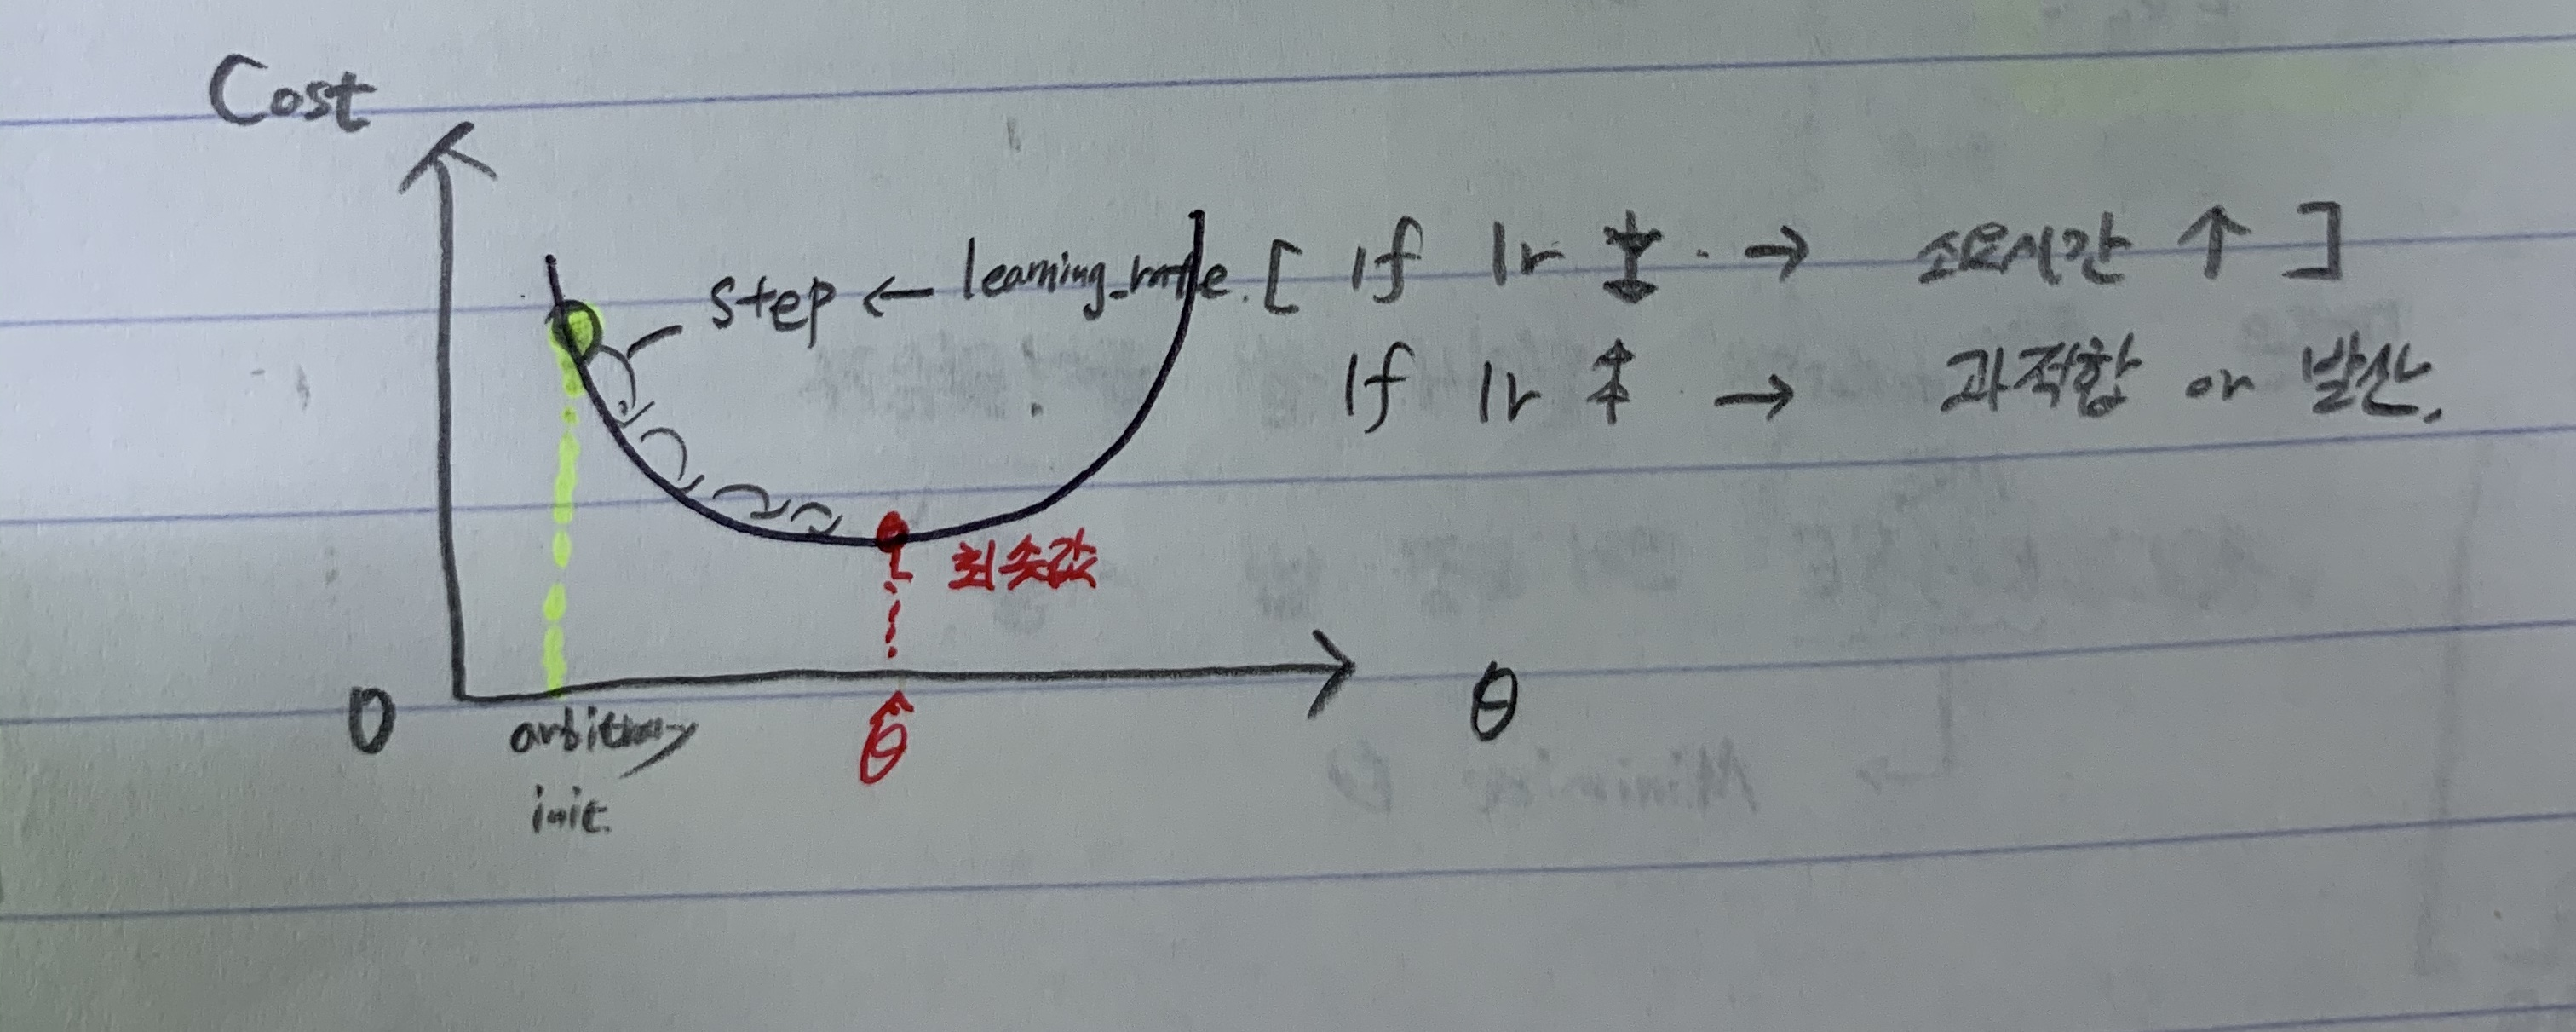

In [7]:
Image('1.JPG',width=800)

## 4.2.1 경사하강법GD의 2 가지 문제점  
  
- (1) Random init으로 인해 Global min 보다 안 좋은 Local min에 수렴할 수 있다.  



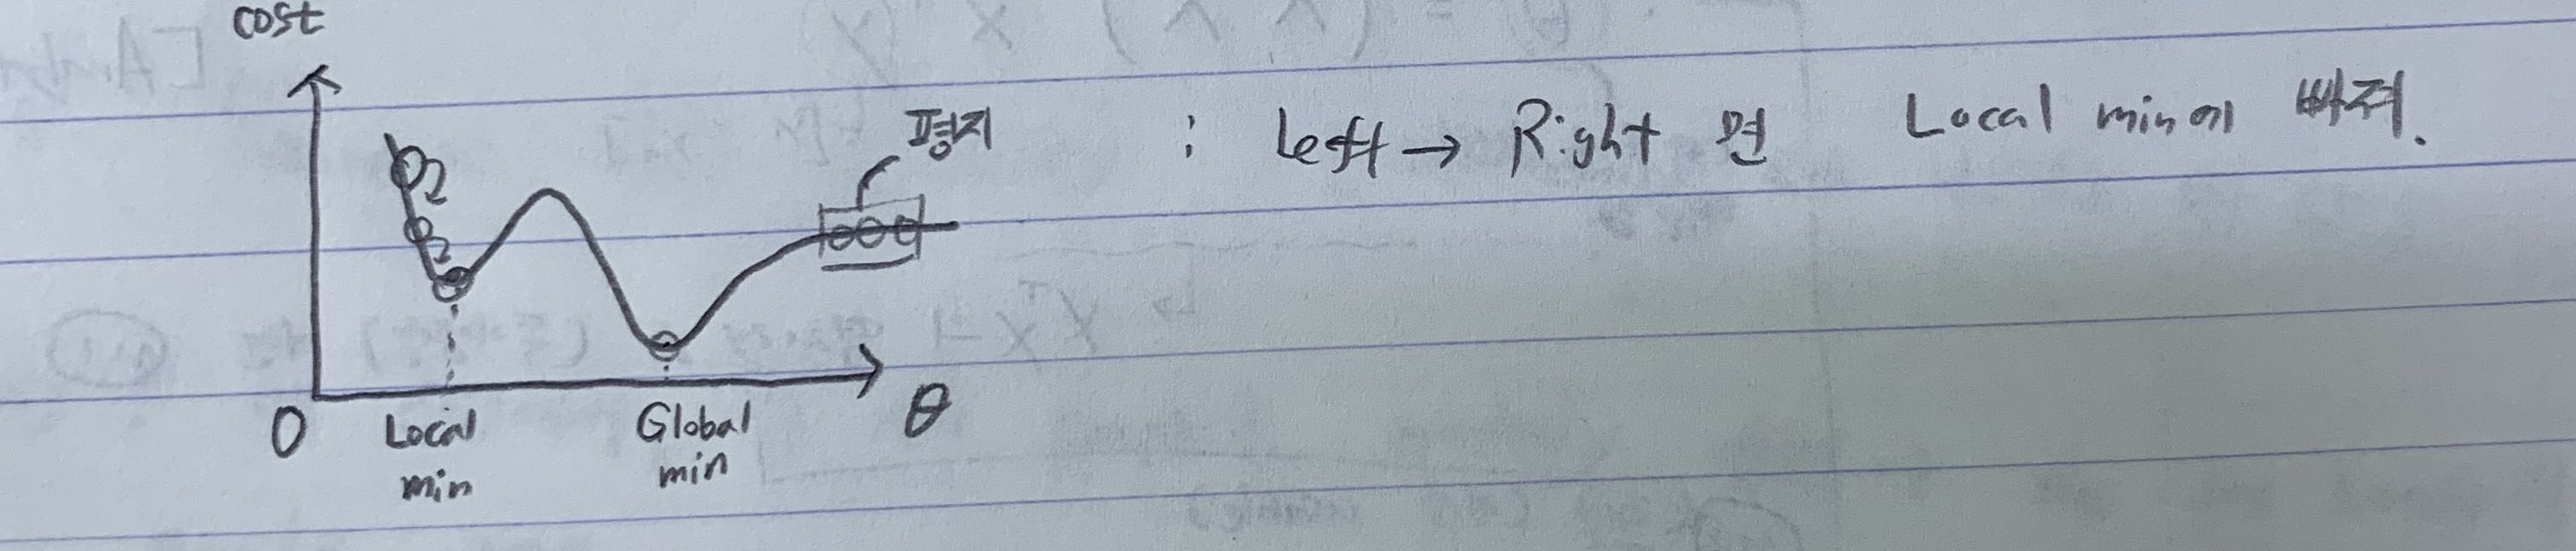

In [8]:
Image('2.JPG',width=800)

- (2) Features의 scale이 매우 다르면, (본래 원형이) 변형될 수 있다.  

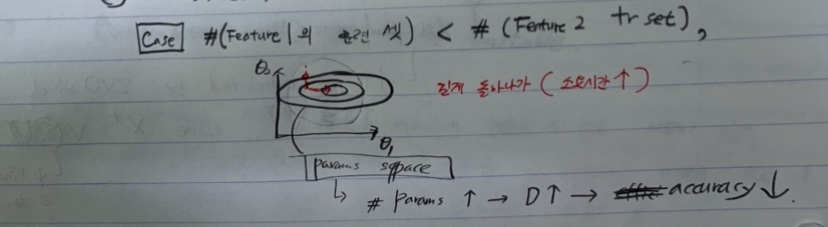

In [10]:
Image('3.jpg',width=800)

## 4.2.2 Batch 경사 하강법 ( Full 경사 하강법)  
  
각 스텝마다 **전체** 트레이닝 셋 X에 대해 계산

경사 하강법 step:  


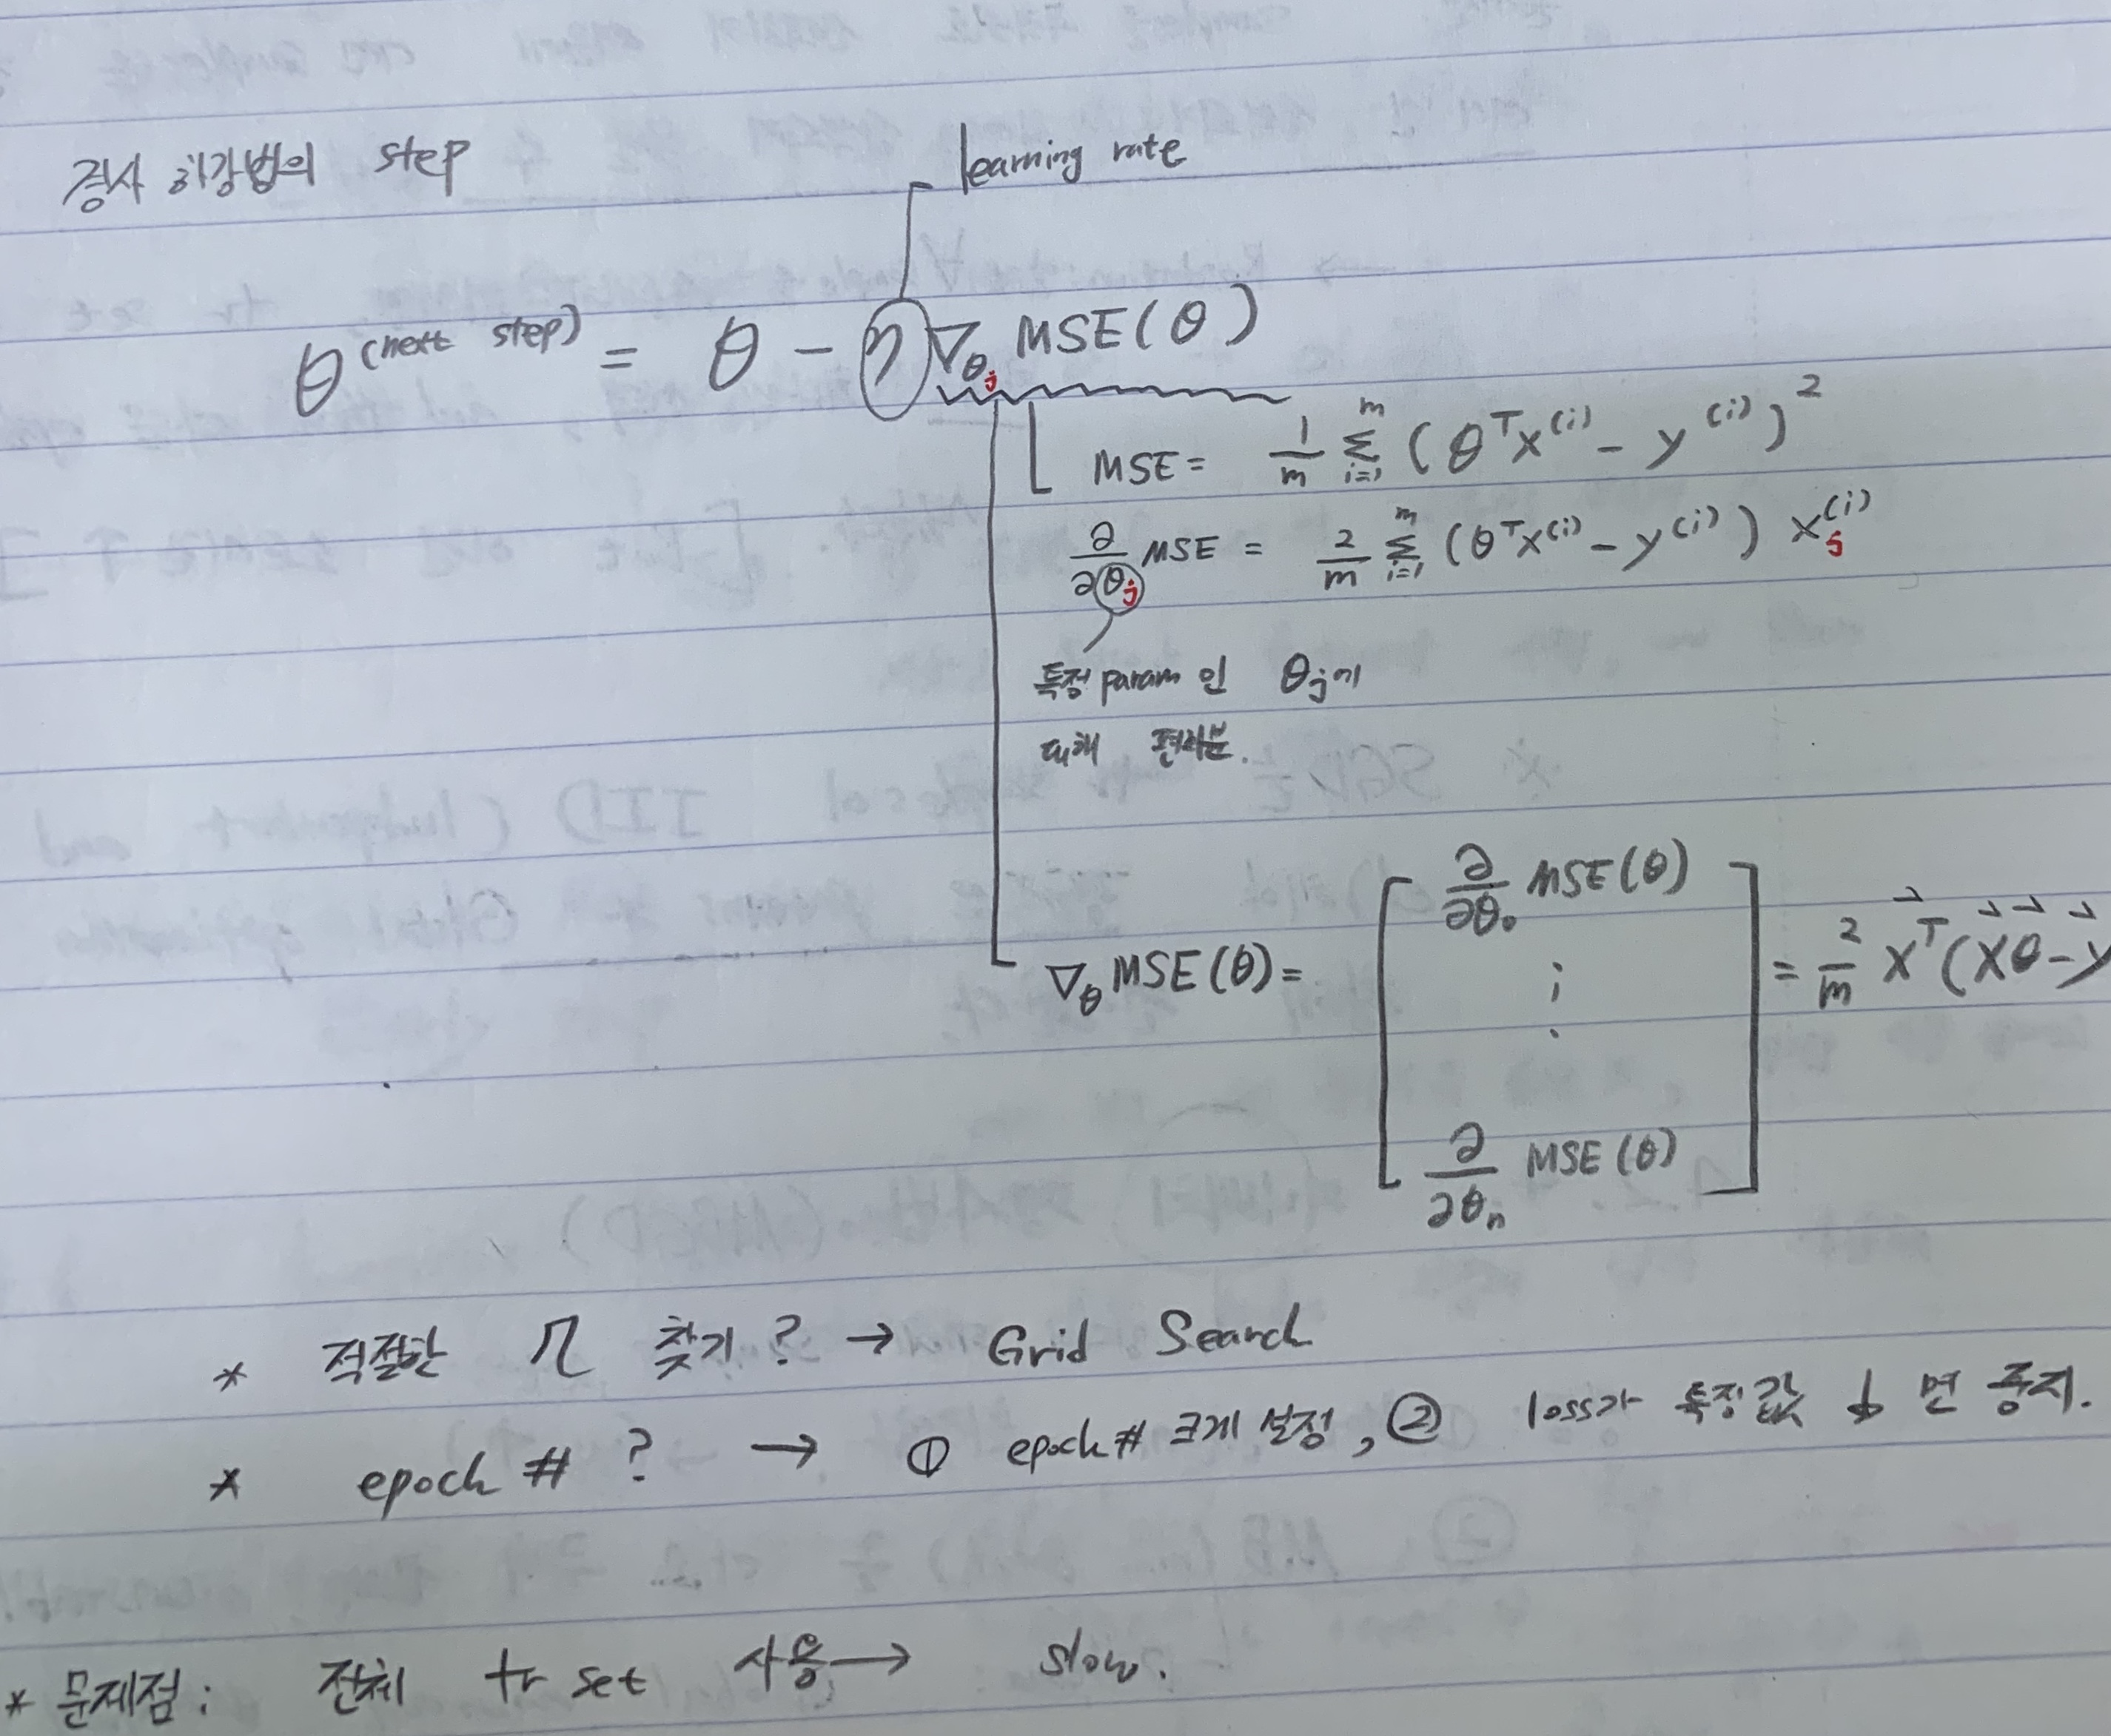

In [12]:
Image('4.JPG',width=800)

In [6]:
lr = 0.1 # 학습률
n_iters = 1000 # 반복 횟수
m = 100 

theta = np.random.randn(2,1)

for iter in range(n_iters):

    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - lr*gradients
    if iter % 100 == 0:
        print('epoch',iter,'\ntheta: ',theta)



epoch 0 
theta:  [[2.13194836]
 [1.86479207]]
epoch 100 
theta:  [[4.0015483 ]
 [2.97789097]]
epoch 200 
theta:  [[4.04807187]
 [2.9392    ]]
epoch 300 
theta:  [[4.05195092]
 [2.93597402]]
epoch 400 
theta:  [[4.05227435]
 [2.93570504]]
epoch 500 
theta:  [[4.05230132]
 [2.93568262]]
epoch 600 
theta:  [[4.05230357]
 [2.93568075]]
epoch 700 
theta:  [[4.05230375]
 [2.93568059]]
epoch 800 
theta:  [[4.05230377]
 [2.93568058]]
epoch 900 
theta:  [[4.05230377]
 [2.93568058]]


## 4.2.3 확률적 경사 하강법 SGD  
  
이것은 외부 메모리 학습 알고리즘으로 구현될 수 있다.  

> Review. 이것은 1장에서 본 일종의 **온라인학습** --- 데이터를 순차적으로 한 개씩, 또는 미니배치라 부르는 작은 묶음 단위로 주입하여 시스템을 훈련시킨다 --- 이다. **외부_메모리_학습**이란 한 대의 컴퓨터의 main memory에 들어갈 수 없는 큰 데이터셋을 학습하는 시스템에서 사용하는 온라인 학습을 일컫는 데 사용되는 개념이다.
  
- 이점: 매 스텝마다, 한 개의 샘플을 임의적으로 선택 --> 이 하나의 샘플에 대한 grads를 계산한다. [ Faster ]  
  
- 단점: 배치 경사 하강법에 비해 학습 과정이 Unstable  
  
> 매 반복에서 학습률을 결정하는 함수: 학습 스케줄

In [7]:
from matplotlib import pyplot as plt
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 파라미터

def learning_schedule(t): 

    return t0/(t+t1)

theta = np.random.randn(2,1)
epochs=[]
thetas=[]

for epoch in range(n_epochs):

    for i in range(m): # m은 트레이닝셋 내의 샘플 개수

        random_idx = np.random.randint(m)
        xi = X_b[random_idx:random_idx+1] # 하나의 샘플 선택
        yi = y[random_idx:random_idx+1] # 비교를 위한 하나의 정답 선택
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)

        lr = learning_schedule(epoch*m+i)
        theta = theta - lr*gradients

    if (epoch+1) % 5 == 0:

        print('epoch:',(epoch+1), '\ntheta: ',theta)

    

epoch: 5 
theta:  [[3.984016  ]
 [2.98713217]]
epoch: 10 
theta:  [[4.0422578 ]
 [2.99686131]]
epoch: 15 
theta:  [[4.00305957]
 [2.98834769]]
epoch: 20 
theta:  [[3.93939036]
 [2.9924949 ]]
epoch: 25 
theta:  [[3.93805936]
 [2.99151246]]
epoch: 30 
theta:  [[3.95301985]
 [3.0110707 ]]
epoch: 35 
theta:  [[3.89189293]
 [2.8988866 ]]
epoch: 40 
theta:  [[4.0223393 ]
 [3.03656616]]
epoch: 45 
theta:  [[4.02012866]
 [2.9957396 ]]
epoch: 50 
theta:  [[4.03039598]
 [2.95212064]]


In [8]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [9]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.03863744]), array([2.98314322]))

### SGD가 마주한 딜레마  
  
이것은 학습 과정이 불안정하기 때문에, Local min에서 탈출하여 결국 Global min으로 **향할** 수 있다는 이점이 있는 반면에, 바로 이 불안정성 때문에 결코 Global min으로 **수렴할** 수 없다는 단점이 있다.  
  
### 위 딜레마에 대한 해소 방안 1  
  
- 학습률을 처음에는 크게 정한 뒤, 점진적으로 감소. 이 과정은 '담금질 기법' simulated annealing과 비슷하다.  
> 매 iter에서 학습률을 결정하는 함수: Learning Schedule
  


### SGD의 문제점  
  
이 방법은 샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 epoch에서 *여러 번 선택되거나 아예 선택되지 못할 수* 있다.  
  
### 위 문제점에 대한 해소 방안  
  
: 학습 과정에서 모델이 알고리즘의 모든 샘플을 사용하게 하려면, 트레이닝 셋을 섞은 뒤, **차례로** 하나씩 그 샘플들을 선택하게 한다. 그런 뒤에, 다음 epoch에서 다시 그 셋을 섞는다. [하지만 이 방안은 **많은_소요시간을_요구한다**는 단점이 있다.]  
  
### 주의 사항  
  
SGD는 트레이닝 샘플이 IID(Independent and Identically Distributed)해야 평균적으로 params이 Global Optimation Point를 향해 진행한다.

## 4.2.4 미니배치 경사법(MBGD)  
  
> 미니배치: 임의의 small samples set  
  
### MBGD 사용의 장점  
  
- (1) 행렬 연산에 최적화 (성능 향상)  
  
- (2) 미니배치를 다소 크게 잡으면, 불안정성이 낮아진다.  
> 위 장점 (2)의 딜레마: Global Min에서 빠져나오기 더 힘들 수 있다.

# 4.3 Polynomial Regression

비선형 데이터를 학습하는 데 선형 모델을 사용할 수 있다. 

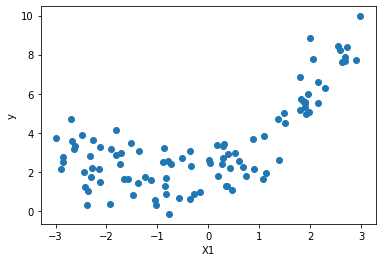

In [22]:
m = 100
X = 6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1) # 특성의 거듭제곱을 새로운 특성으로 추가

plt.scatter(X,y)
plt.xlabel('X1')
plt.ylabel('y')
plt.show()

위 그림은 분명 직선(선형)에 잘 맞지 않는 데이터이다. 우리는 이 훈련 자료들을 변환해볼 것이다.

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False) #다항특성의 매개변수 degree의 기본값은 2, include_bias의 기본값은 True이다. 이 경우, 편향을 위한 특성인 1이 추가됨.
X_poly = poly_features.fit_transform(X)
print(X[0], X_poly[0])

[0.61996309] [0.61996309 0.38435424]


-0.03175751042304453 [ 23.09309101 -19.76577445]


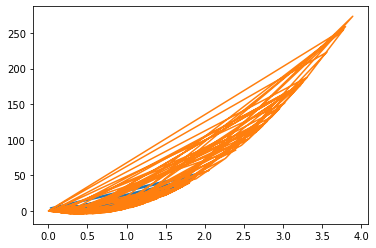

In [31]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_[-1], lin_reg.coef_[-1])

y=lin_reg.coef_[-1][0]*X_poly**2+lin_reg.coef_[-1][1]*X_poly+lin_reg.intercept_

plt.plot(X_poly,y)
plt.show()




# 4.4 Learning Curve

고차 다항 회귀 모델은 선형 모델보다 더 훈련 자료에 잘 맞추려고 할 것이다. 하지만 이 경우 과적합 문제가 발생할 수 있다. 반면에 선형 모델은 과소적합 문제가 발생할 수 있다.  
  


### 교차 검증을 이용한 과적합 정도 판단 1 (교차검증) 
  
- 훈련 데이터 성능 Good & 교차 검증 점수 Bad ==> 과대적합  
- 훈련 데이터 성능 Bad & 교차 검증 점수 Bad ==> 과소적합

### 교차 검증을 이용한 과적합 정도 판단 2 (학습곡선)
  
- 이 방법은 **학습곡선**을 살펴보는 방법이다. 아래 코드를 보라.

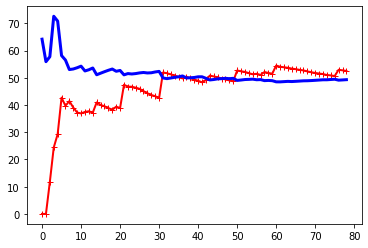

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):

    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2) # 1. 데이터 쪼개기
    train_errors, val_errors=[],[] # 에러 초기화

    for m in range(1, len(X_train)): # 데이터 훈련 샘플 개수 만큼 loop

        model.fit(X_train[:m], y_train[:m]) # m 개까지 model fit 해줌
        y_train_predict = model.predict(X_train[:m]) # y의 예측값은 훈련셋의 m 개까지의 자료로 구한다.
        y_val_predict = model.predict(X_val) # 검증셋에서의 예측은 X검증셋 전체로 구한다
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict)) # 학습 자료와 학습의 예측 자료로 오차 구한다
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+",linewidth=2, label="Training set")
    plt.plot(np.sqrt(val_errors), "b-",linewidth=3, label="Val set")

lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

위 그래프는 **과소적합**의 전형이다. 두 곡선이 (1) 수평 구간을 만들고, (2) 꽤 높은 오차에서 매우 가까이 근접해 있다.

##### 훈련 데이터의 성능  
  
- 그래프 0에서 시작 ==> 훈련셋에 1 or 2 개의 샘플이 있을 때는 모델이 잘 작동  
  
- 훈련셋에 샘플 추가 --> 잡음+비선형 됨 --> 모델이 훈련 데이터 완전히 학습 불가능해짐 (=> 곡선이 flat 해질 때까지 **오차_상승**)  


##### 검증 데이터의 성능  
  
- 모델이 적은 수의 훈련 샘플로 훈련 ==> (제대로 일반화 x) 검증 오차가 초기에 크다. 샘플 추가 --> 학습됨 & 검증 오차 점진적 감소

비교를 위해 이번에는 10차 다항 회귀 학습 곡선을 그려보자.

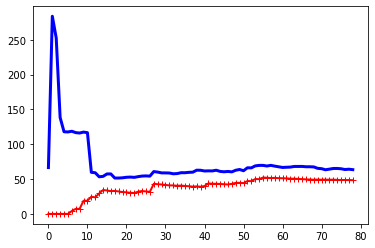

In [40]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                                  ("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
                                  ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression,X,y)

#### 비교: 처음 곡선과의 차이점  
  
- 훈련 데이터 오차가 처음 (선형) 곡선 보다 낮다  
- 두 곡선 간의 공간이 있다. (: 훈련 데이터에서 성능 better than 검증 데이터) ==> **과대적합_모델**의 특징

#### 과대적합 모델을 개선하는 하나의 방법  
  
훈련 오차에 근접할 때까지 더 많은 훈련 데이터 추가하기

### 편향/분산 트레이드오프  
  
- 편향 bigger --> 과소적합 가능성 증가
- 분산variance은 자유도가 높은 모델 (가령 고차 다항 회귀 모델)에서 잘 나타난다. 분산 higher --> 과대적합 가능성 증가  
- Irreducible Error: 데이터 자체가 갖은 잡음. --> 데이터 내에서 잡음을 제거해야 함.(이상치 감지, 고장난 센서의 데이터 소스 고치기)


# 4.5 규제

### Lidge  
  
- Lidge: $$J(\theta)=MSE(\theta)+\alpha\frac{1}{2}\sum_{j=1}^n \theta_i^2$$  
  
- Lidge 회귀의 정규방정식:  
$$\hat{\theta}=(X^TX+\alpha A)^{-1}X^Ty$$

  


In [43]:
#정규방정식 이용한 릿지 규제  

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[17.45704295, 54.18819747]])

### Rasso  
    
- Rasso: $J(\theta)=MSE(\theta)+\alpha\sum_{j=1}^n |\theta_i|$  
  
> Rasso의 특징: 덜 중요한 features의 가중치를 제거해준다. (즉 그것을 0으로 만든다) Rasso는 자동으로 features를 선택한 뒤, Sparse Model을 만든다.  
  

In [45]:
from sklearn.linear_model import Lasso

lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])


array([[17.40758364, 54.16142219]])

### Elastic Net  
  
라쏘 + 릿지 라고 생각할 수 있다. 혼합 정도는 그 비율 $r$을 사용해 조절한다. $r=0$이면 이건 릿지 회귀와 같고, $r=1$이면 라쏘 회귀와 같다.  
  
$$J(\theta)=MSE(\theta)+r\alpha \sum_{i=1}^n|\theta_i|+\frac{1-r}{2}\alpha \sum_{i=1}^n \theta_i^2$$
  


In [46]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([[17.40911814, 54.05101494]])

### 언제 무슨 규제를 사용할 것인가?  
  
일반적으로 규제를 사용하는 것이 더 좋다.   
  
- 기본적으로 사용되는 것은 **릿지**이다.   
  
- 하지만 특성이 몇 개 뿐이라고 의심되면 **라쏘,엘라스틱넷**이 더 낫다. 이 모델들은 전술했듯이 불필요한 특성의 가중치를 0으로 만들어준다.  
  
- (1) 특성 수 > 훈련 샘플 수 or (2) 특성 몇 개가 강하게 연관 ---> 엘라스틱넷 선호

### 조기 종료 Early Stopping  
  
- 조기 종료: GD 같은 **반복적_학습_알고리즘**을 규제하는 독특한 방식은 *검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것*이다.

# 4.6 Logistic Regression   
  
여러 개의 이진 분류기를 훈련시키지 않고, 직접 다중 클래스를 지원한다. 이 방법은 *샘플이 특정 클래스에 속할 확률*의 추정을 구하는 데 널리 사용된다.

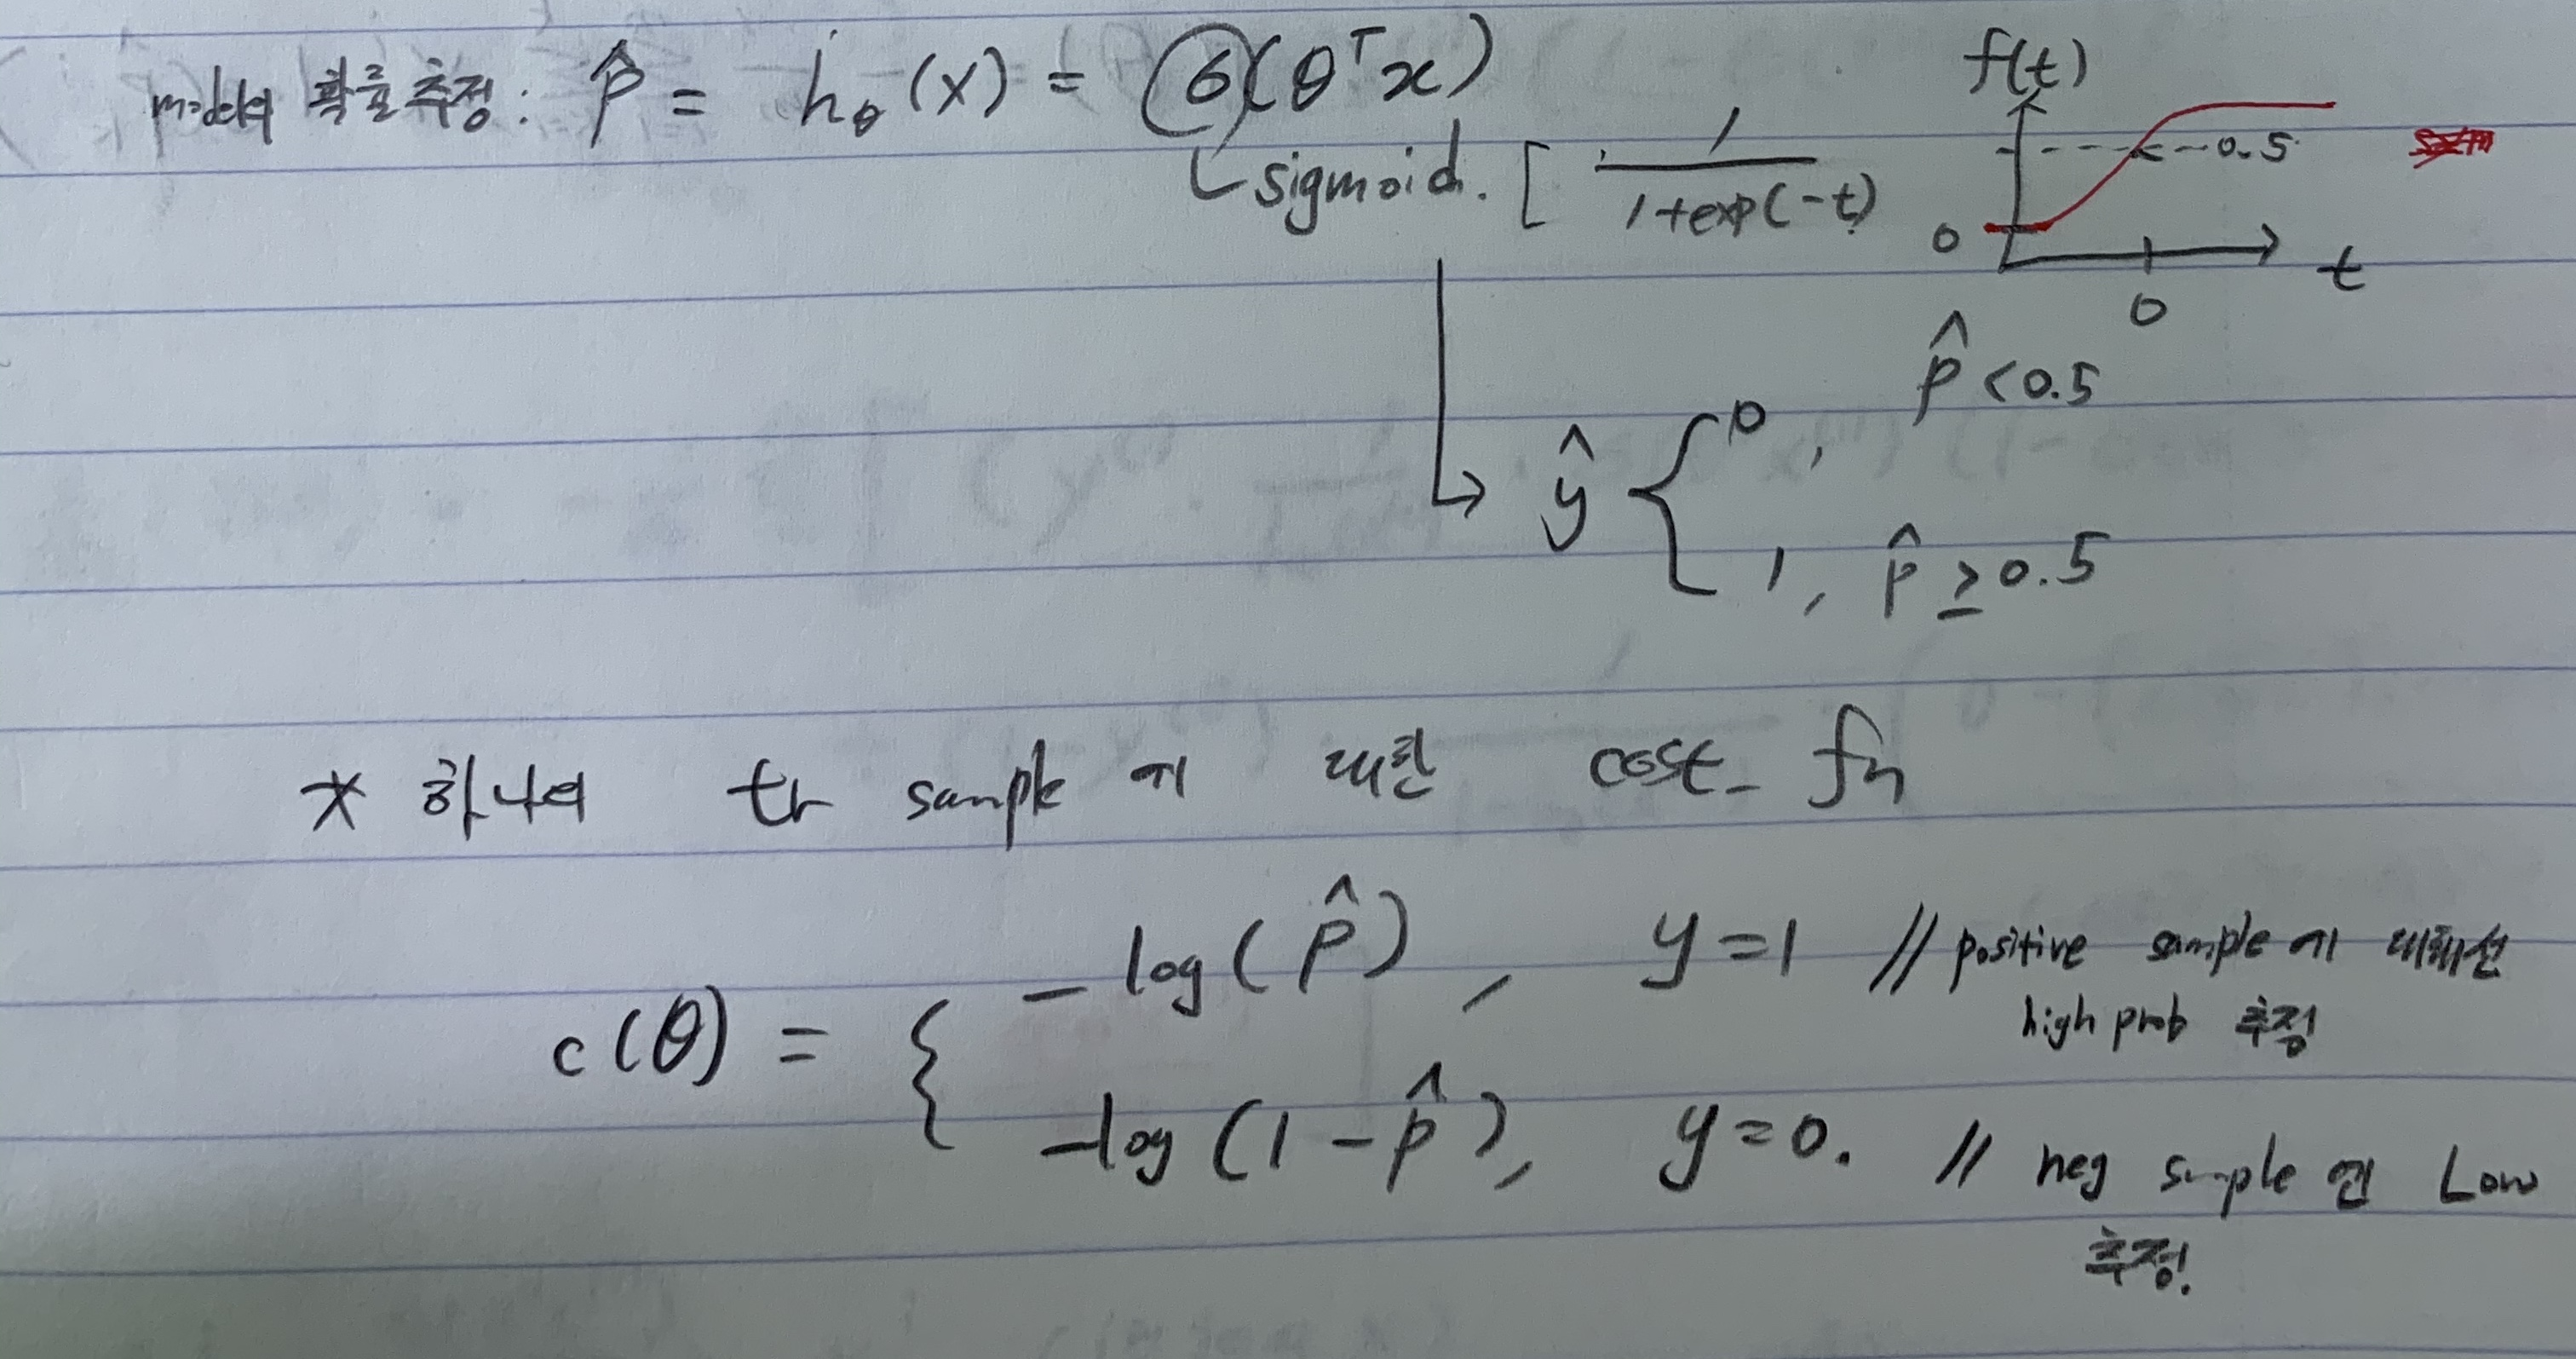

In [14]:
Image('5.JPG',width=800)

로지스틱 회귀의 비용함수:  
  
$J(\theta) =$ $-\frac{1}{m}\sum_{i=1}^m [y^i log(\hat{p}^i) + (1-y^i) log(1-\hat{p}^i)]$  
> $h_{\theta}(x) = \frac{1}{1+exp^{(-\theta^Tx)}}$

$\frac{\partial J(\theta)}{\partial \theta_j}$:  
  
[로지스틱 회귀의 비용함수 미분 계산](https://github.com/musicjae/Hands_on_ML/blob/master/%284%29%20Training%20Models/The_Derivation_of_Logistic_Regression.ipynb)

## 4.6.2 소프트맥스 회귀 (Multinomial Logistic Regression)  
  
1. 어떤 샘플 X를 고려할 때, 각 클래스 k에 대한 $S_k(x)$를 계산해보자. 여기에 소프트맥스 함수를 적용하면, 각 클래스의 확률을 추정할 수 있다.  
  
> 클래스 k에 대한 소프트맥스 점수: $S_k(x)=(\theta^{(k)})^Tx$   
  
> 위 식에서 $\theta^{(k)}$는  parameter vector $\in \theta$이고, $\theta$는 params의 행렬이다.  
  
2. Cross Entrophy 비용 함수를 최소화  
  
: 타깃 클래스에 대해 low probs인 예측 모델을 억제시킨다.  
  
> $J(\theta) = -\frac{1}{m}\sum_{i=1}^m \sum_{k=1}^k y_k^i log(\hat{P_k^i})$
     